# multiple Linear Regression

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
feature_names = diabetes.feature_names
# printig the information about the dataset 
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Create a DataFrame to analyze the dataset
diabetes_df = pd.DataFrame(data=np.c_[X, Y], columns=feature_names + ["Target"])
# Check for missing values
print("\nMissing values:")
print(diabetes_df.isnull().sum())


Missing values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64


In [5]:
# Split the dataset into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

In [6]:
# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)
# Print the coefficients and MSE
print("\nCoefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.2f}")
# The intercept is a constant value that represents 
# the predicted value when all feature values are zero.    
print("\nIntercept:", model.intercept_) 
print("Mean Squared Error:", mse)


Coefficients:
age: -35.56
sex: -243.17
bmi: 562.75
bp: 305.47
s1: -662.79
s2: 324.28
s3: 24.78
s4: 170.33
s5: 731.68
s6: 43.03

Intercept: 152.5381335195406
Mean Squared Error: 3424.3166882137334


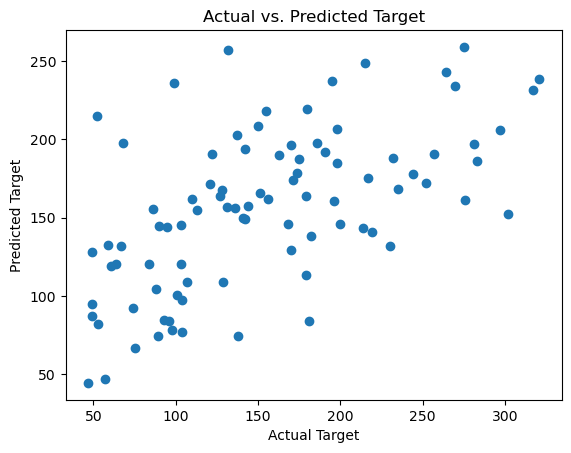

In [7]:

# Visualize the predictions
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs. Predicted Target")
plt.show()
